In [3]:
import sys
import os

sys.path.append(os.path.join('..', '..', '..'))

In [4]:
from roboflow import Roboflow
from config import ROBOFLOW_API_KEY

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("mihailo").project("football-field-detection-f07vi-apxzb")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-field-detection-1 in yolov8:: 100%|██████████| 1666/1666 [00:01<00:00, 1329.07it/s]


Error reading from C:\Users\jmcol\AppData\Roaming\Ultralytics\settings.json: "No Ultralytics setting 'openvino_msg'. \nView Ultralytics Settings with 'yolo settings' or at 'C:\\Users\\jmcol\\AppData\\Roaming\\Ultralytics\\settings.json'\nUpdate Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings."
Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\jmcol\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
import os
import yaml

YAML_PATH = os.path.join(dataset.location,"data.yaml")

with open(YAML_PATH) as f:
     list_doc = yaml.safe_load(f)

list_doc['test'] = '../test/images'
list_doc['train'] = '../train/images'
list_doc['val'] = '../valid/images'

print(list_doc)

with open(YAML_PATH, "w") as f:
    yaml.dump(list_doc, f)

{'flip_idx': [24, 25, 26, 27, 28, 29, 22, 23, 21, 17, 18, 19, 20, 13, 14, 15, 16, 9, 10, 11, 12, 8, 6, 7, 0, 1, 2, 3, 4, 5, 31, 30], 'kpt_shape': [32, 3], 'names': ['pitch'], 'nc': 1, 'roboflow': {'license': 'CC BY 4.0', 'project': 'football-field-detection-f07vi-apxzb', 'url': 'https://universe.roboflow.com/mihailo/football-field-detection-f07vi-apxzb/dataset/1', 'version': 1, 'workspace': 'mihailo'}, 'test': '../test/images', 'train': '../train/images', 'val': '../valid/images'}


In [6]:
!yolo task=pose mode=train model=yolo11n-pose.pt data={YAML_PATH} batch=32 epochs=500 patience=40 imgsz=640 mosaic=0.0 plots=True cache=False

New https://pypi.org/project/ultralytics/8.3.241 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.69 🚀 Python-3.11.4 torch-2.6.0+cpu CPU (11th Gen Intel Core i7-11800H @ 2.30GHz)
engine\trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=C:\Users\jmcol\PycharmProjects\Football-Analysis\models\football-field-detection-1\data.yaml, epochs=500, time=None, patience=40, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnos


  0%|          | 0.00/5.97M [00:00<?, ?B/s]
 19%|█▉        | 1.12M/5.97M [00:00<00:00, 10.0MB/s]
 36%|███▌      | 2.12M/5.97M [00:00<00:00, 5.20MB/s]
 46%|████▌     | 2.75M/5.97M [00:00<00:00, 4.59MB/s]
 54%|█████▍    | 3.25M/5.97M [00:00<00:00, 4.36MB/s]
 63%|██████▎   | 3.75M/5.97M [00:00<00:00, 4.17MB/s]
 71%|███████   | 4.25M/5.97M [00:00<00:00, 4.08MB/s]
 80%|███████▉  | 4.75M/5.97M [00:01<00:00, 4.00MB/s]
 88%|████████▊ | 5.25M/5.97M [00:01<00:00, 3.92MB/s]
 96%|█████████▋| 5.75M/5.97M [00:01<00:00, 3.88MB/s]
100%|██████████| 5.97M/5.97M [00:01<00:00, 4.28MB/s]

  0%|          | 0.00/755k [00:00<?, ?B/s]
100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]

train: Scanning C:\Users\jmcol\PycharmProjects\Football-Analysis\models\football-field-detection-1\train\labels...:   0%|          | 0/765 [00:00<?, ?it/s]
train: Scanning C:\Users\jmcol\PycharmProjects\Football-Analysis\models\football-field-detection-1\train\labels... 132 images, 0 backgrounds, 0 corrupt:  17%|█▋        | 132

In [7]:
!yolo mode=train resume model=runs/pose/train6/weights/last.pt task=pose data={YAML_PATH} batch=32 epochs=500 patience=40 imgsz=640 mosaic=0.0 plots=True cache=False

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\jmcol\PycharmProjects\Football-Analysis\venv\Scripts\yolo.exe\__main__.py", line 7, in <module>
  File "C:\Users\jmcol\PycharmProjects\Football-Analysis\venv\Lib\site-packages\ultralytics\cfg\__init__.py", line 957, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\jmcol\PycharmProjects\Football-Analysis\venv\Lib\site-packages\ultralytics\models\yolo\model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "C:\Users\jmcol\PycharmProjects\Football-Analysis\venv\Lib\site-packages\ultralytics\engine\model.py", line 146, in __init__
    self._load(model, task=task)
  File "C:\Users\jmcol\PycharmProjects\Football-Analysis\venv\Lib\site-packages\ultralytics\engine\model.py", line 289, in _load
    self.model, self.ckpt = attempt_load_one_weight

In [8]:
RESULTS_DIR = 'runs/pose/train6'

FileNotFoundError: [Errno 2] No such file or directory: 'runs/pose/train6/val_batch0_pred.jpg'

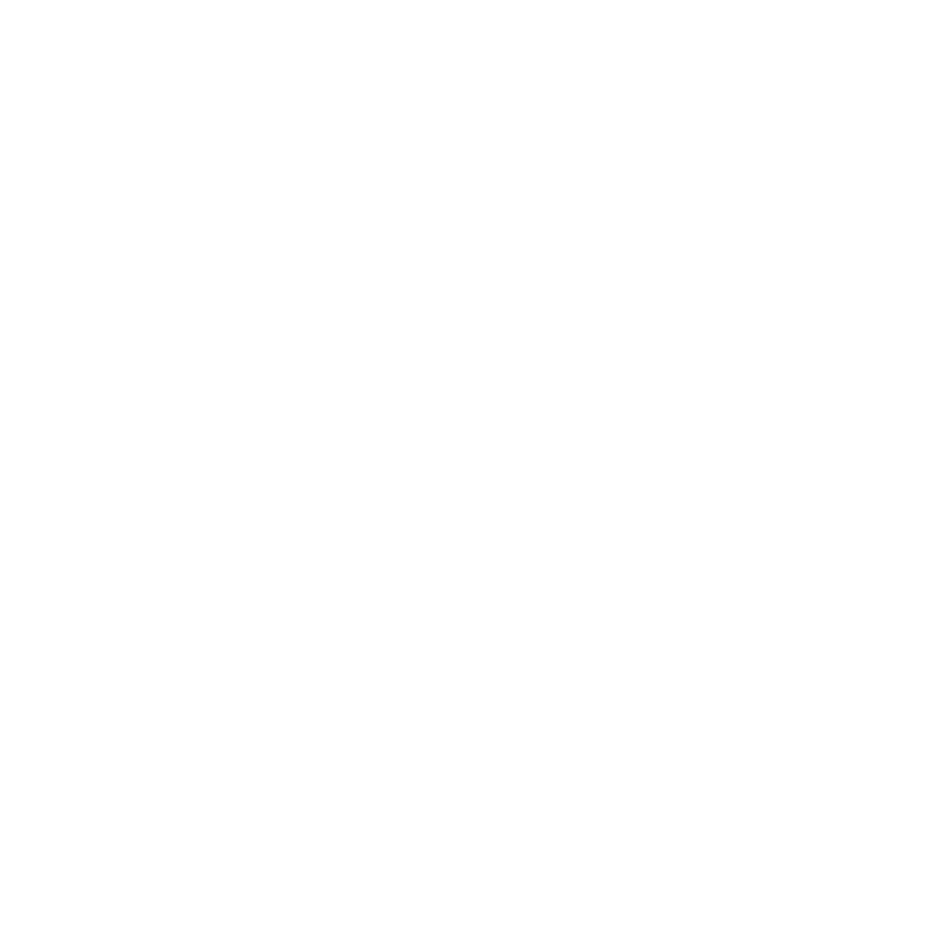

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,12))
plt.axis(False)
plt.imshow(mpimg.imread(f'{RESULTS_DIR}/val_batch0_pred.jpg'))

plt.show()

In [ ]:
!yolo task=pose mode=val model={RESULTS_DIR}/weights/best.pt data={YAML_PATH}

In [ ]:
import os
import shutil

source_path = f'{RESULTS_DIR}/weights/best.pt'
destination_dir = '../../weights'
destination_file = os.path.join(destination_dir, 'weights/keypoints-detection.pt')

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move and rename the file
try:
    shutil.move(source_path, destination_file)
    print(f"File moved and renamed to {destination_file}")
except FileNotFoundError:
    print(f"Source file '{source_path}' not found.")
except Exception as e:
    print(f"Error occurred: {e}")